## Demo Aritificial intelligence programming


In [2]:
import random
import numpy as np
from mcts import MCTS
from ANET import ANET
from Simworld import visualize_state,Hex
from tqdm import tqdm
from IPython import display
import time
import pandas as pd
from TOPP import TOPP
from train import train_anet
import matplotlib.pyplot as plt
ReLU = "ReLU"
Adam = "Adam"

## Training

### Set parameters

In [ ]:
# Default parameters
GAME = Hex
STARTING_PLAYER_ID = 1
BOARD_SIZE = 4
EPISODES = 10
NUM_SIMULATIONS = 100
NUM_AGENTS = 5
BATCH_SIZE = 0.5

# ANET parameters
HIDDEN_LAYERS = (64, 32)  # (16,16) #[128]  # (32,32) (48,24) (16,16)
LEARNING_RATE = 0.1
HIDDEN_LAYERS = [128]
LEARNING_RATE = 0.001
ACTIVATION = 'ReLU'
OPTIMIZER = 'Adam'
EPOCHS = 5

# MCTS parameters
EPSILON = 1
EPSILON_DECAY_DEGREE = 1/2
C = 1
# Batch strategy
BATCH_TYPE_RELATIVE = True
BS_DEGREE = 3

#RUN PARAMETERS
VISUALIZATION_EPISODES = [1,EPISODES]

In [ ]:
environment = Hex(BOARD_SIZE)
batch_strategy = "probability_function"
anet = ANET(input_size=BOARD_SIZE, hidden_layers=HIDDEN_LAYERS,lr=LEARNING_RATE, activation=ACTIVATION, optimizer=OPTIMIZER, EPOCHS=EPOCHS)
SERIES_NAME_TAG = input("Series name tag: ")
train_anet(series_name, anet, BOARD_SIZE, environment, EPISODES, NUM_SIMULATIONS,NUM_AGENTS, BATCH_SIZE,eps=EPSILON,epsilon_decay_degree=EPSILON_DECAY_DEGREE, bs_degree=BS_DEGREE, batch_type_relative=BATCH_TYPE_RELATIVE,vis_episode=VISUALIZATION_EPISODES)

## Run TOPP on shortly trained model

In [ ]:
NUM_GAMES = 10

In [7]:
topp = TOPP(series_name=SERIES_NAME_TAG,board_size=BOARD_SIZE, game=Hex, num_games=NUM_GAMES, episodes=EPISODES, num_agents=NUM_AGENTS,hidden_layers=HIDDEN_LAYERS)
wins = topp.run_tournament(visualize=False)

Loaded model from models/smalllr_5_ANET_level_0
Loaded model from models/smalllr_5_ANET_level_50
Loaded model from models/smalllr_5_ANET_level_100
Loaded model from models/smalllr_5_ANET_level_150
Loaded model from models/smalllr_5_ANET_level_200


In [ ]:

df = pd.DataFrame(wins)
norm = df/((NUM_AGENTS-1)*2*NUM_GAMES)
norm.plot.bar(title=f"TOPP,ANET trained on {EPISODES} episodes")
plt.show() 

In [ ]:
topp.print_scoreboard_results()

### Run TOPP on pretrained model 5x5 board

In [4]:
SERIES_NAME_TAG = "smalllr"

GAME = Hex
STARTING_PLAYER_ID = 1
BOARD_SIZE = 5
EPISODES = 200
NUM_AGENTS = 5

# TOPP PARAMETERS
NUM_GAMES = 100

# ANET parameters for loading
HIDDEN_LAYERS = (64, 32)

In [5]:
topp = TOPP(SERIES_NAME_TAG,BOARD_SIZE,GAME,NUM_GAMES,EPISODES,NUM_AGENTS,HIDDEN_LAYERS)
wins = topp.run_tournament()

Loaded model from models/smalllr_5_ANET_level_0
Loaded model from models/smalllr_5_ANET_level_50
Loaded model from models/smalllr_5_ANET_level_100
Loaded model from models/smalllr_5_ANET_level_150
Loaded model from models/smalllr_5_ANET_level_200


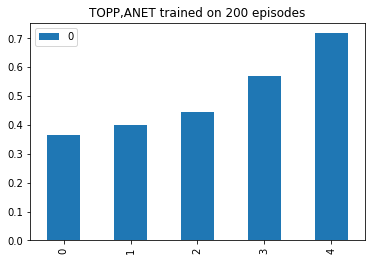

In [8]:
df2 = pd.DataFrame(wins)
norm = df2/((NUM_AGENTS-1)*2*NUM_GAMES)
norm.plot.bar(title=f"TOPP,ANET trained on {EPISODES} episodes")
plt.show() 

In [6]:
topp.play_random(NUM_AGENTS-1)

0.92

### Run TOPP on pretrained model 4x4 board